# Agregated metrics plot

Coco Yu

### Set Up Environment

Set up parameters as variables

In [ ]:
(study <- params$study)

[1] "ema"

[1] "1day"

[1] 0

[1] "v5"

[1] "nested"

[1] "main"

Function conflicts

In [ ]:
# source
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/fun_ml.R?raw=true")

ℹ SHA-1 hash of file is "77e91675366f10788c6bcb59fa1cfc9ee0c75281"

Chunk Defaults

In [ ]:
knitr::opts_chunk$set(attr.output='style="max-height: 500px;"')

options(tibble.width = Inf)
options(tibble.print_max = Inf)

Packages for script

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Source support functions

In [ ]:
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true")

ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

Absolute paths

In [ ]:
path_fairema <- format_path(str_c("studydata/risk/data_processed/fairema"))

### Read in data

In [ ]:
df_gender <- read_csv(here::here(path_fairema, str_c("outer_preds_perf_", "gender", "_", window, 
                                           "_", lead, "_", version, "_", cv, "_", model,
                                           ".csv")),
                      col_types = cols())
df_gender$attribute <- "gender"

df_race <- read_csv(here::here(path_fairema, str_c("outer_preds_perf_", "race", "_", window, 
                                           "_", lead, "_", version, "_", cv, "_", model,
                                           ".csv")),
                    col_types = cols())
df_race$attribute <- "race"

df_income <- read_csv(here::here(path_fairema, str_c("outer_preds_perf_", "income", "_", window, 
                                           "_", lead, "_", version, "_", cv, "_", model,
                                           ".csv")),
                      col_types = cols())
df_income$attribute <- "income"

df_age <- read_csv(here::here(path_fairema, str_c("outer_preds_perf_", "age", "_", window, 
                                           "_", lead, "_", version, "_", cv, "_", model,
                                           ".csv")),
                   col_types = cols())
df_age$attribute <- "age"

### Construct Plots

In [ ]:
df <- rbind(df_gender, df_race, df_income, df_age) |> 
  filter(group != "all")

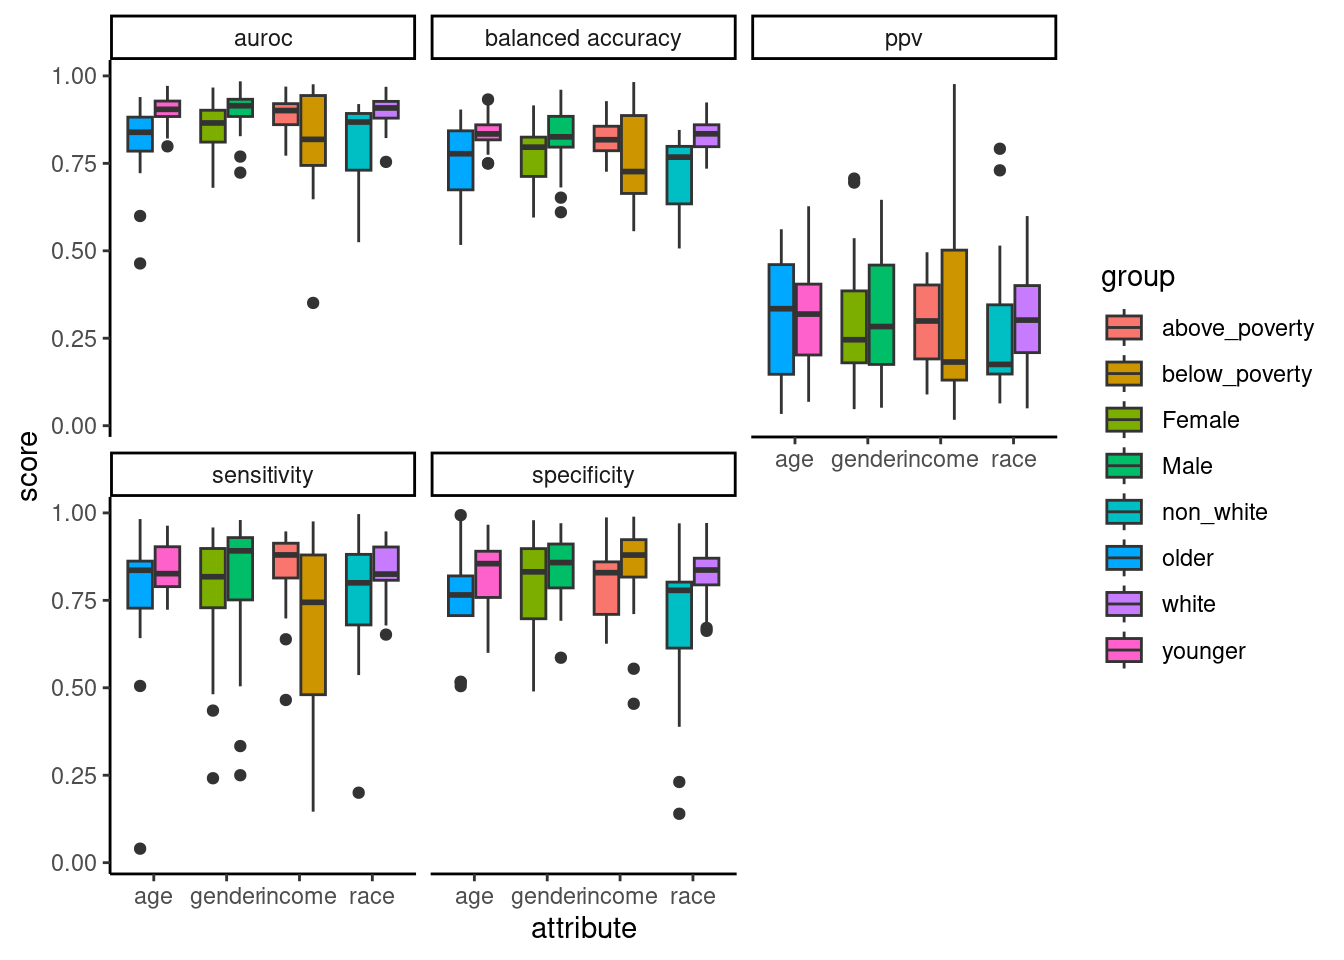

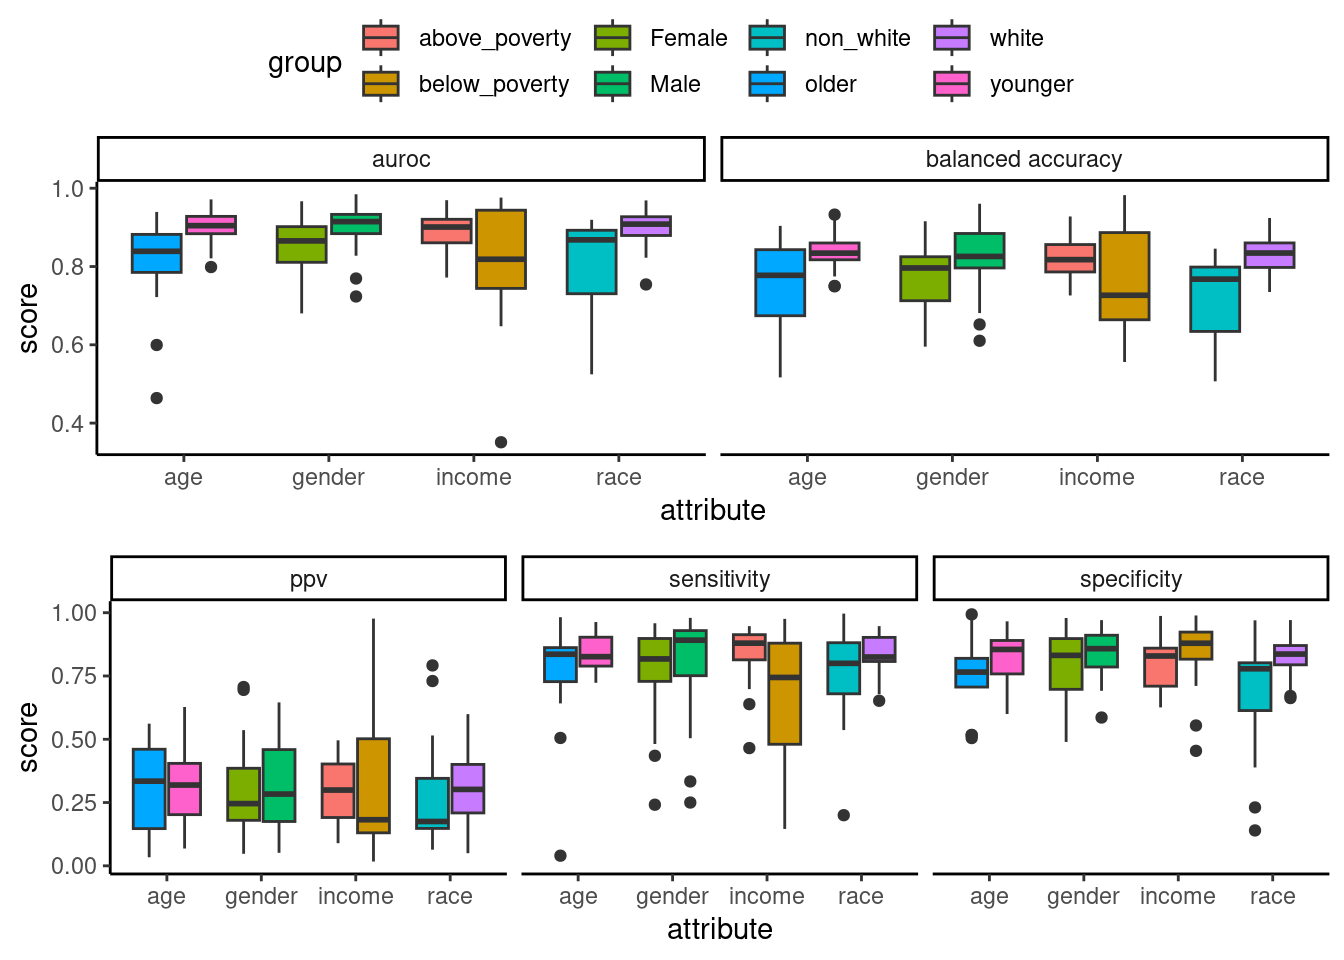

In [ ]:
df |> 
  pivot_longer(-c("outer_split_num", "group", "attribute"),
               names_to = "metrics", values_to = "score") |>
  mutate(metrics = case_when(metrics == "balaccuracy" ~ "balanced accuracy",
                             metrics != "balaccuracy" ~ metrics)) |>
  ggplot(aes(x = attribute, y = score, fill = group)) +
  geom_boxplot() +
  facet_wrap(~metrics) +
  theme_classic()

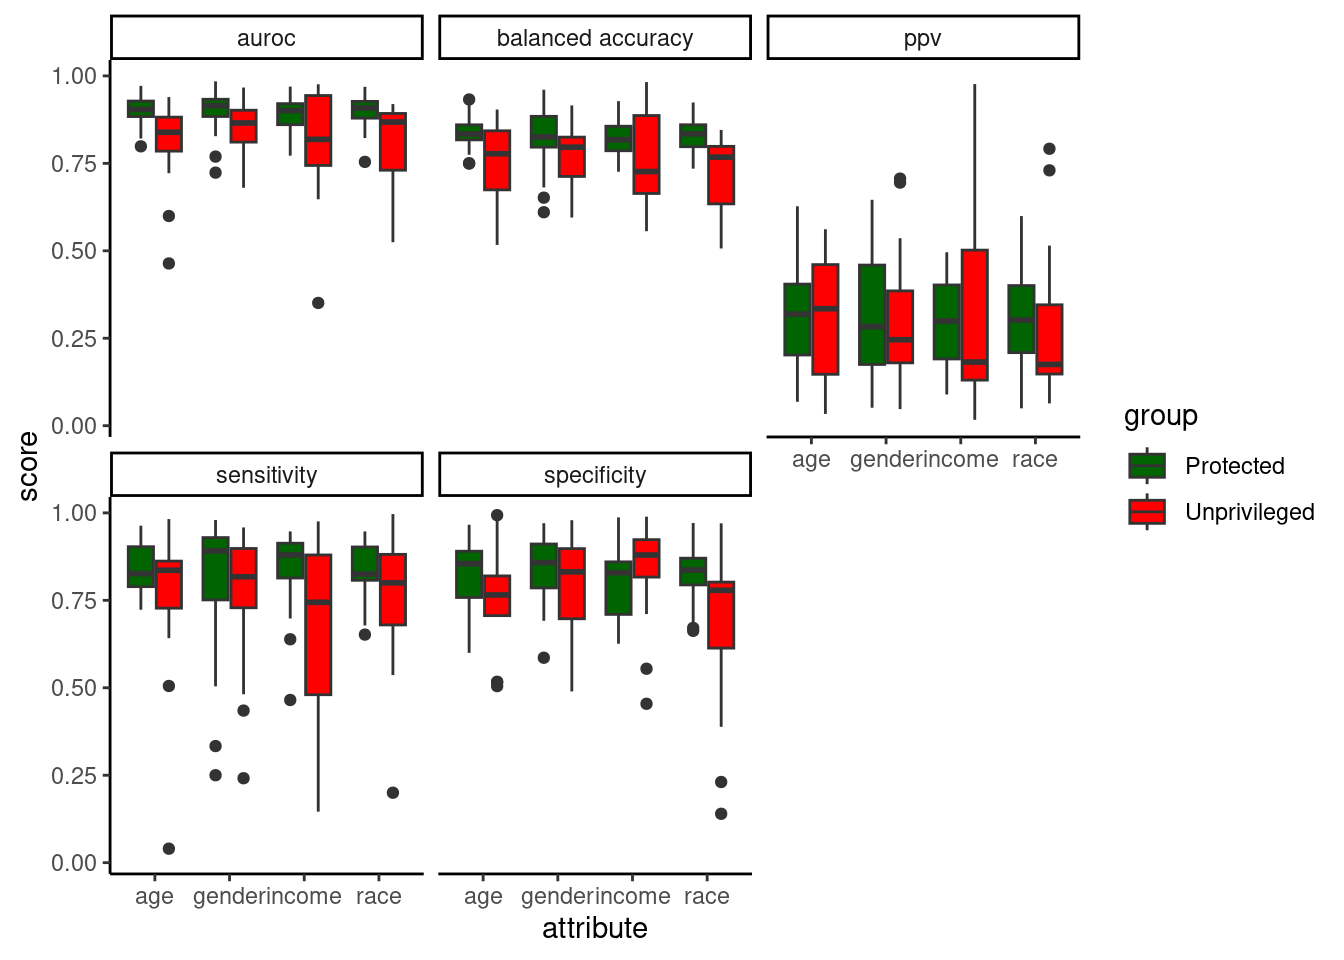

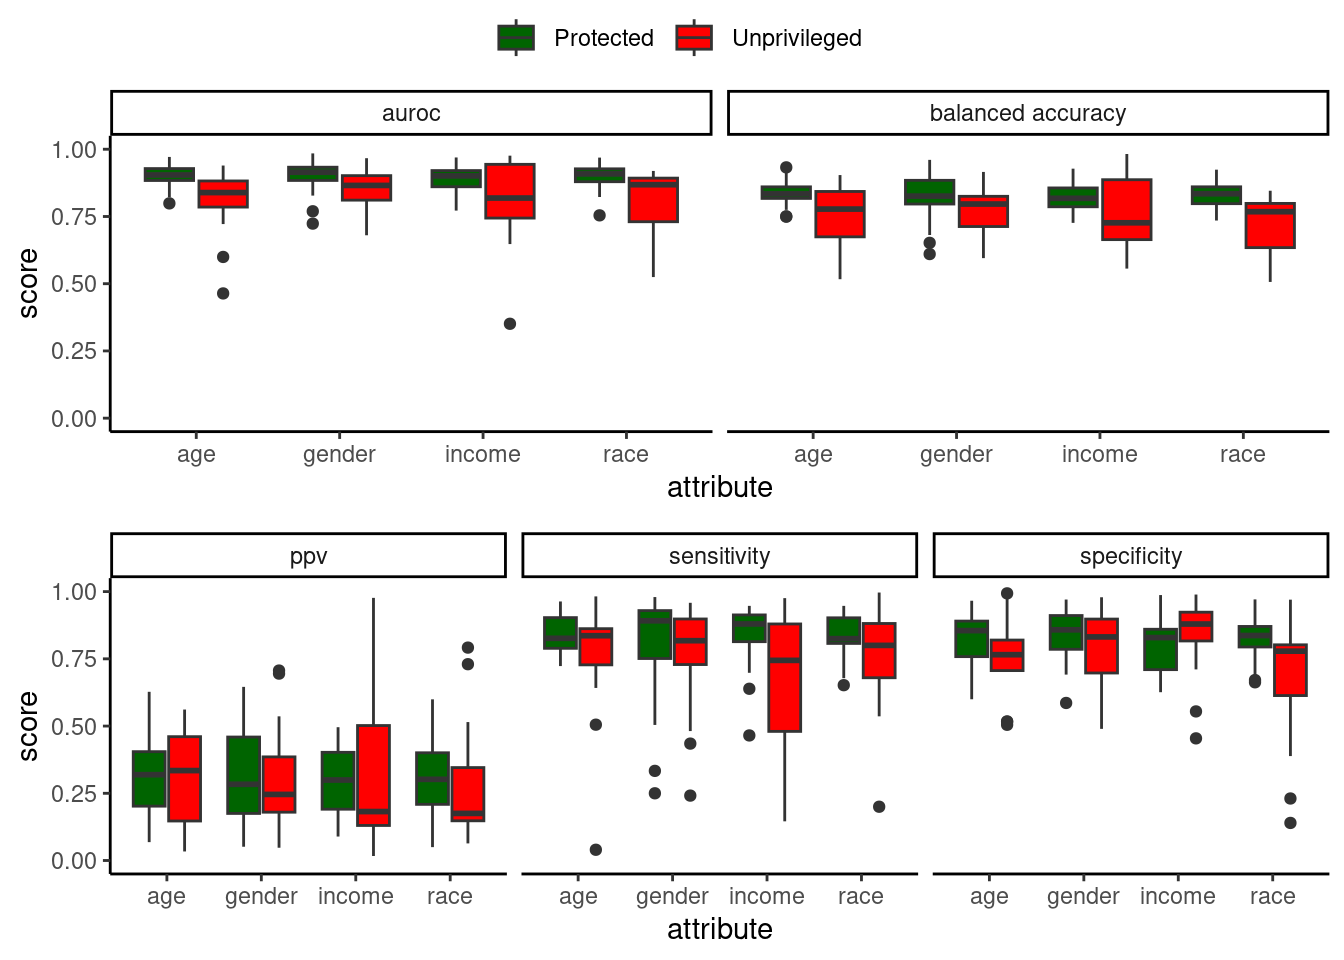

In [ ]:
df |> 
  pivot_longer(-c("outer_split_num", "group", "attribute"),
               names_to = "metrics", values_to = "score") |>
  mutate(metrics = case_when(metrics == "balaccuracy" ~ "balanced accuracy",
                             metrics != "balaccuracy" ~ metrics),
         group = if_else(
           group %in% c("Female", "non_white", "below_poverty", "older"),
           "Unprivileged",
           "Protected"
         )) |>
  ggplot(aes(x = attribute, y = score, fill = group)) +
  geom_boxplot() +
  facet_wrap(~metrics) +
  scale_fill_manual(values = c("Protected" = "darkgreen", 
                                "Unprivileged" = "red")) +
  theme_classic()

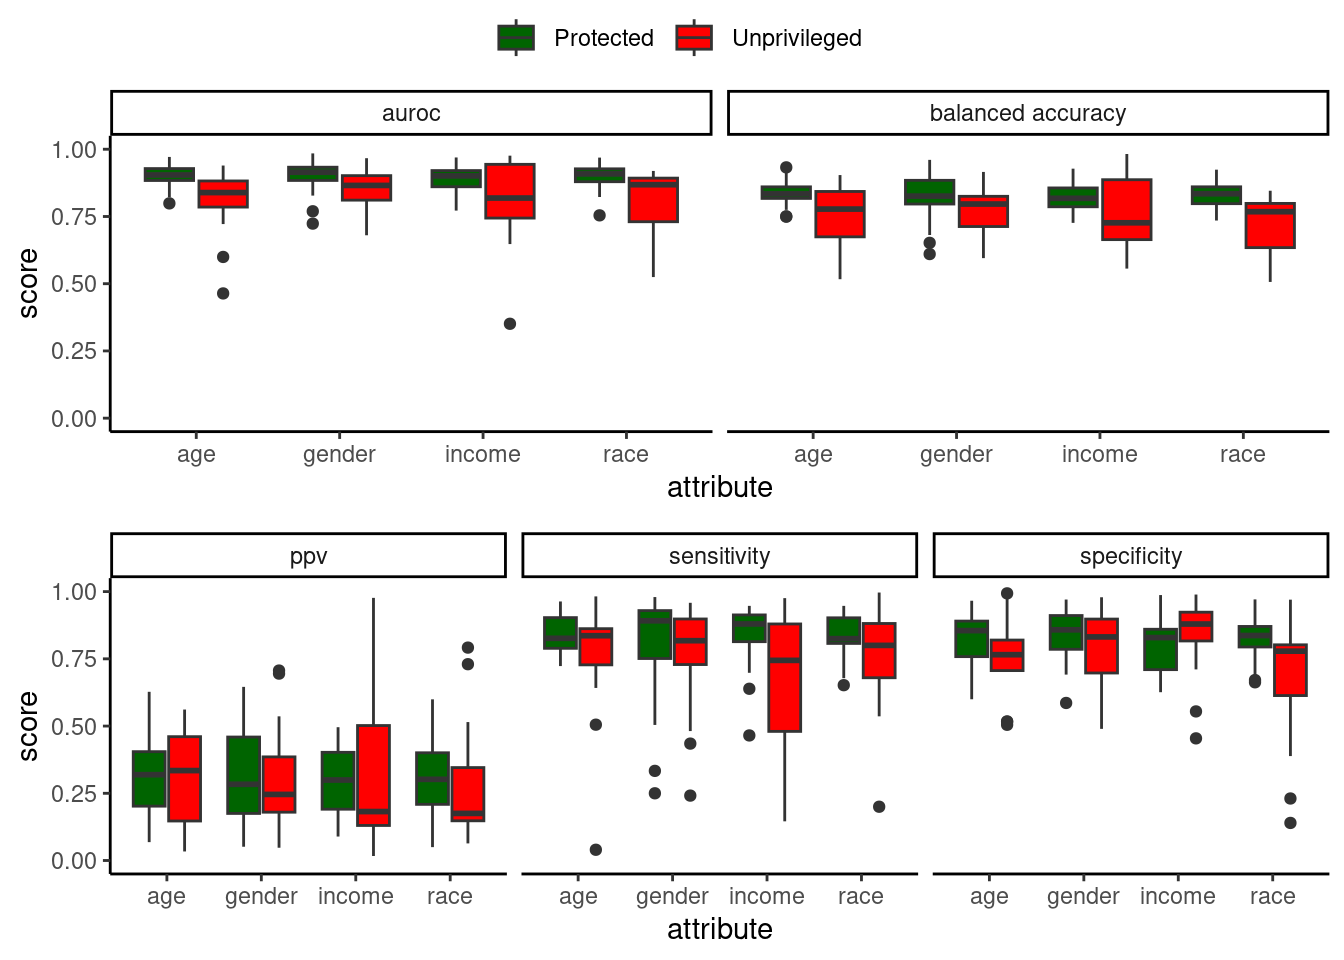

In [ ]:
#| label: final_plot

ggpubr::ggarrange(plot3, plot4, nrow = 2, common.legend = TRUE)